# TensorFlow__SimpleLSTM_sin-curve

In [1]:
ipynb_title = "TensorFlow__SimpleLSTM_sin-curve_ipynb"

<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Config" data-toc-modified-id="Config-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Config</a></span><ul class="toc-item"><li><span><a href="#Import" data-toc-modified-id="Import-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Import</a></span></li><li><span><a href="#TensorFlow" data-toc-modified-id="TensorFlow-1.2"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>TensorFlow</a></span></li><li><span><a href="#seed" data-toc-modified-id="seed-1.3"><span class="toc-item-num">1.3&nbsp;&nbsp;</span>seed</a></span></li><li><span><a href="#Path" data-toc-modified-id="Path-1.4"><span class="toc-item-num">1.4&nbsp;&nbsp;</span>Path</a></span></li><li><span><a href="#Import-from-Local" data-toc-modified-id="Import-from-Local-1.5"><span class="toc-item-num">1.5&nbsp;&nbsp;</span>Import from Local</a></span></li></ul></li><li><span><a href="#DATA" data-toc-modified-id="DATA-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>DATA</a></span><ul class="toc-item"><li><span><a href="#Generate-Data" data-toc-modified-id="Generate-Data-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Generate Data</a></span></li></ul></li><li><span><a href="#MODEL" data-toc-modified-id="MODEL-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>MODEL</a></span><ul class="toc-item"><li><span><a href="#parameters" data-toc-modified-id="parameters-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>parameters</a></span></li><li><span><a href="#placeholder" data-toc-modified-id="placeholder-3.2"><span class="toc-item-num">3.2&nbsp;&nbsp;</span>placeholder</a></span></li><li><span><a href="#inference" data-toc-modified-id="inference-3.3"><span class="toc-item-num">3.3&nbsp;&nbsp;</span>inference</a></span></li><li><span><a href="#loss" data-toc-modified-id="loss-3.4"><span class="toc-item-num">3.4&nbsp;&nbsp;</span>loss</a></span></li><li><span><a href="#Computational-Graph" data-toc-modified-id="Computational-Graph-3.5"><span class="toc-item-num">3.5&nbsp;&nbsp;</span>Computational Graph</a></span></li></ul></li><li><span><a href="#Fitting" data-toc-modified-id="Fitting-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Fitting</a></span><ul class="toc-item"><li><span><a href="#Parameters" data-toc-modified-id="Parameters-4.1"><span class="toc-item-num">4.1&nbsp;&nbsp;</span>Parameters</a></span></li><li><span><a href="#Tensorboard" data-toc-modified-id="Tensorboard-4.2"><span class="toc-item-num">4.2&nbsp;&nbsp;</span>Tensorboard</a></span></li><li><span><a href="#Run" data-toc-modified-id="Run-4.3"><span class="toc-item-num">4.3&nbsp;&nbsp;</span>Run</a></span></li></ul></li><li><span><a href="#Predict" data-toc-modified-id="Predict-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Predict</a></span></li><li><span><a href="#Visualize" data-toc-modified-id="Visualize-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Visualize</a></span></li><li><span><a href="#Computational-Graph" data-toc-modified-id="Computational-Graph-7"><span class="toc-item-num">7&nbsp;&nbsp;</span>Computational Graph</a></span></li><li><span><a href="#End" data-toc-modified-id="End-8"><span class="toc-item-num">8&nbsp;&nbsp;</span>End</a></span></li></ul></div>

## Config

### Import

In [2]:
import os,sys
print(sys.version)

import re
from pathlib import Path
import math

3.5.2 (default, Nov 23 2017, 16:37:01) 
[GCC 5.4.0 20160609]


In [3]:
# OPTIONAL: Load the "autoreload" extension so that code can change
%load_ext autoreload
# OPTIONAL: always reload modules so that as you change code in src, it gets loaded
%autoreload 2
# If you want to reload manually, add a below line head.
%aimport
# ref: https://ipython.org/ipython-doc/3/config/extensions/autoreload.html

import matplotlib.pyplot as plt
%matplotlib inline

import numpy as np
import sklearn
from sklearn import datasets
import tqdm
import csv
import pandas as pd

print("numpy ver: {}".format(np.__version__))
print("scikit-learn ver: {}".format(sklearn.__version__))
print("pandas ver: {}".format(pd.__version__))

Modules to reload:
all-except-skipped

Modules to skip:

numpy ver: 1.15.2
scikit-learn ver: 0.20.0
pandas ver: 0.23.4


### TensorFlow

In [4]:
#____________________________________________________________________________________________________
#  TensorFlow and Keras GPU configures
##________________________________________________________________________________
##  OPTIONAL : set a GPU viewed by TensorFlow
###____________________________________________________________
###  - https://stackoverflow.com/questions/37893755/tensorflow-set-cuda-visible-devices-within-jupyter
import os
os.environ["CUDA_DEVICE_ORDER"]="PCI_BUS_ID"   # see issue #152
#os.environ["CUDA_VISIBLE_DEVICES"]="0"
##________________________________________________________________________________


##________________________________________________________________________________
##  TensorFlow
###____________________________________________________________
import tensorflow as tf
print("tensorflow ver: {}".format(tf.__version__))
###  eager mode
#tf.enable_eager_execution()
print("tf.executing_eagerly(): {}".format(tf.executing_eagerly()))

# You can double check that you have the correct devices visible to TF
#   - https://stackoverflow.com/questions/37893755/tensorflow-set-cuda-visible-devices-within-jupyter
from tensorflow.python.client import device_lib
print("""
________________________________________
Visible GPUs from TensorFlow
________________________________________""")
for _device in device_lib.list_local_devices():
    match = re.search(pattern=r'name: "/device:(?P<name>[A-Z]{3}):(?P<device_num>\d{1})*',
                      string=str(_device))
    if match is None:
        print("Not Match")
        continue
    if match.group("name") == "CPU":
        name, device_num = match.group("name", "device_num")
        print()
        print("({}:{})".format(name, device_num))
        continue
    name, device_num = match.group("name", "device_num")
    match = re.search(pattern=r'.*pci bus id: (?P<pci_bus_id>\d{4}:\d{2}:\d{2}.\d{1}).*',
                      string=str(_device))
    if match is None:
        print("No GPUs")
        continue
    print("({}:{}: pci_bus_id: {})".format(name, device_num, match.group("pci_bus_id")))
print("________________________________________")

###____________________________________________________________
###  sessioin
global _SESSION
config = tf.ConfigProto(allow_soft_placement=True,
                        log_device_placement=True)
config.gpu_options.allow_growth = True
#_SESSION = tf.Session(config=config)
###____________________________________________________________
##________________________________________________________________________________
#____________________________________________________________________________________________________

tensorflow ver: 1.11.0
tf.executing_eagerly(): False

________________________________________
Visible GPUs from TensorFlow
________________________________________

(CPU:0)
________________________________________


In [5]:
from sklearn.model_selection import train_test_split
from sklearn.utils import shuffle

### seed

In [6]:
from sklearn.model_selection import train_test_split
from sklearn.utils import shuffle

seed_np = 0
seed_tf = 1234

np.random.seed(seed_np)
tf.set_random_seed(seed_tf)

### Path

In [7]:
HOME = Path(os.getcwd()).parent
print(HOME)

/home/sugisaki/workdir/git/learning_DeepLearning_TimeSeries


In [8]:
path_list = []
data_Path = HOME / "data"
src_Path = HOME / "src"
figures_Path = HOME / "reports" / "figures" / ipynb_title
tensorflow_log_Path = HOME / "tensorflow_log" / ipynb_title
models_Path = HOME / "models" / ipynb_title
history_Path = HOME / "history" / ipynb_title

path_list.append(data_Path)
path_list.append(src_Path)
path_list.append(figures_Path)
path_list.append(tensorflow_log_Path)
path_list.append(models_Path)
path_list.append(history_Path)


for _Path in path_list:  # make directories if not exists
    _Path.mkdir(parents=True, exist_ok=True)

### Import from Local

In [9]:
sys.path.append(str(src_Path))

In [10]:
from utils_tensorflow.early_stopping import EarlyStopping
from utils_tensorflow.tensorflow_graph_in_jupyer import show_computational_graph

## DATA

### Generate Data

In [ ]:
def sin(x, T=100):
    return np.sin(2.0 * np.pi * x / T)

def toy_problem(T=100, ampl=0.05):
    x = np.arange(0, 2 * T + 1)
    noise = ampl * np.random.uniform(low=-1.0, high=1.0, size=len(x))
    return sin(x) + noise

In [ ]:
T = 100
f = toy_problem(T)

length_of_sequences = 2 * T  # 全時系列の長さ
maxlen = 25  # ひとつの時系列データの長さ

data = []
target = []

for i in range(0, length_of_sequences - maxlen + 1):
    data.append(f[i: i + maxlen])
    target.append(f[i + maxlen])

X_data = np.array(data).reshape(len(data), maxlen, 1)
Y_data = np.array(target).reshape(len(data), 1)

# データ設定
N_train = int(len(data) * 0.9)
N_validation = len(data) - N_train

X_train, X_validation, Y_train, Y_validation = \
    train_test_split(X_data, Y_data, test_size=N_validation)


## MODEL

In [ ]:
tf.reset_default_graph()

### parameters

In [ ]:
n_in = len(X_data[0][0])  # 1
n_hidden = 30
n_out = len(Y_data[0])  # 1
n_hidden = 30
print(n_hidden)
print(n_hidden)
print(n_out)

30
30
1


### placeholder

In [ ]:
with tf.name_scope(name="placeholder"):
    X = tf.placeholder(tf.float32, shape=[None, maxlen, n_in])
    y = tf.placeholder(tf.float32, shape=[None, n_out])
    n_batch = tf.placeholder(tf.int32, shape=[])

### inference

In [ ]:
with tf.name_scope(name="inference"):
    def weight_variable(shape):
        initial = tf.truncated_normal(shape, stddev=0.01)
        return tf.Variable(initial)
    def bias_variable(shape):
        initial = tf.zeros(shape, dtype=tf.float32)
        return tf.Variable(initial)

    cell = tf.nn.rnn_cell.LSTMCell(num_units=n_hidden, use_peepholes=False, forget_bias=1.0, activation=None)
    initial_state = cell.zero_state(batch_size=n_batch, dtype=tf.float32)

    state = initial_state
    outputs = []  # 過去の隠れ層の出力を保存
    with tf.variable_scope('LSTM'):
        for t in range(maxlen): # one data
            # 1st layer : initial_state
            # 2nd, ...  : reuse variables
            if t > 0:
                tf.get_variable_scope().reuse_variables()
            (cell_output, state) = cell(inputs=X[:, t, :], state=state)
            outputs.append(cell_output)
    output = outputs[-1]

    V = weight_variable([n_hidden, n_out])
    c = bias_variable([n_out])
    pred_y = tf.matmul(a=output, b=V) + c  # Dense Layer, linear activation

### loss

In [ ]:
with tf.name_scope(name="loss"):
    loss = tf.reduce_mean(input_tensor=tf.square(x=pred_y - y))

In [ ]:
with tf.name_scope(name="training"):
    optimizer = tf.train.AdamOptimizer(learning_rate=0.001, beta1=0.9, beta2=0.999)
    train_step = optimizer.minimize(loss)

In [ ]:
early_stopping = EarlyStopping(patience=10, verbose=1)
history = { 'val_loss': [] }

### Computational Graph

In [ ]:
#show_computational_graph(tf.get_default_graph())

## Fitting

### Parameters

In [ ]:
epochs = 50000
#epochs = 500
batch_size = 10

init = tf.global_variables_initializer()
sess = tf.Session()
n_batches = N_train // batch_size

### Tensorboard

In [ ]:
#  TensorBoard
if tensorflow_log_Path.exists():
    import shutil
    shutil.rmtree(str(tensorflow_log_Path))
tf_writer = tf.summary.FileWriter(logdir=str(tensorflow_log_Path), graph=sess.graph)

loss_summary = tf.summary.scalar(name='loss_scalar_summary', tensor=loss)

### Run

In [ ]:
sess.run(init)
for epoch in range(epochs):
    X_, Y_ = shuffle(X_train, Y_train)

    for i in range(n_batches):
        start = i * batch_size
        end = start + batch_size

        sess.run(train_step, feed_dict={X: X_[start:end],
                                        y: Y_[start:end],
                                        n_batch: batch_size})
        pred = pred_y.eval(session=sess,
                           feed_dict={X: X_[start:end],
                                      y: Y_[start:end],
                                      n_batch: batch_size})
    # 検証データを用いた評価
    val_loss = loss.eval(session=sess, feed_dict={X: X_validation,
                                                  y: Y_validation,
                                                  n_batch: N_validation})
    summary = sess.run(fetches=loss_summary,
                       feed_dict={X: X_validation,
                                  y: Y_validation,
                                  n_batch: N_validation})
    tf_writer.add_summary(summary=summary, global_step=epoch)

    history['val_loss'].append(val_loss)
    print('epoch:', epoch, ' validation loss:', val_loss)

    # Early Stopping チェック
    #if early_stopping.validate(val_loss):
        #break

epoch: 0  validation loss: 0.36038482
epoch: 1  validation loss: 0.24749629
epoch: 2  validation loss: 0.18719068
epoch: 3  validation loss: 0.121890984
epoch: 4  validation loss: 0.0602042
epoch: 5  validation loss: 0.022681884
epoch: 6  validation loss: 0.016430203
epoch: 7  validation loss: 0.006662916
epoch: 8  validation loss: 0.004259563
epoch: 9  validation loss: 0.0032753113
epoch: 10  validation loss: 0.008913953
epoch: 11  validation loss: 0.005864563
epoch: 12  validation loss: 0.0030900137
epoch: 13  validation loss: 0.0019443507
epoch: 14  validation loss: 0.0016447727
epoch: 15  validation loss: 0.0013309774
epoch: 16  validation loss: 0.0013149336
epoch: 17  validation loss: 0.0016672196
epoch: 18  validation loss: 0.0015878732
epoch: 19  validation loss: 0.0016998923
epoch: 20  validation loss: 0.0013757613
epoch: 21  validation loss: 0.0020418495
epoch: 22  validation loss: 0.0017758613
epoch: 23  validation loss: 0.0015859965
epoch: 24  validation loss: 0.0013003787
e

epoch: 199  validation loss: 0.0013769241
epoch: 200  validation loss: 0.0014380078
epoch: 201  validation loss: 0.001156719
epoch: 202  validation loss: 0.0020853528
epoch: 203  validation loss: 0.0017954693
epoch: 204  validation loss: 0.0013806872
epoch: 205  validation loss: 0.0017942776
epoch: 206  validation loss: 0.0015109219
epoch: 207  validation loss: 0.0013563215
epoch: 208  validation loss: 0.0013018185
epoch: 209  validation loss: 0.0011180256
epoch: 210  validation loss: 0.0015257368
epoch: 211  validation loss: 0.0018647619
epoch: 212  validation loss: 0.0014596923
epoch: 213  validation loss: 0.0015804659
epoch: 214  validation loss: 0.0015689309
epoch: 215  validation loss: 0.0015264198
epoch: 216  validation loss: 0.0014682449
epoch: 217  validation loss: 0.0018245929
epoch: 218  validation loss: 0.001555
epoch: 219  validation loss: 0.0012822184
epoch: 220  validation loss: 0.0021392372
epoch: 221  validation loss: 0.0016301334
epoch: 222  validation loss: 0.00157356

epoch: 396  validation loss: 0.0018364015
epoch: 397  validation loss: 0.0026821618
epoch: 398  validation loss: 0.0015174911
epoch: 399  validation loss: 0.0035539817
epoch: 400  validation loss: 0.0015557837
epoch: 401  validation loss: 0.0013157908
epoch: 402  validation loss: 0.0016872155
epoch: 403  validation loss: 0.0012016147
epoch: 404  validation loss: 0.0020882778
epoch: 405  validation loss: 0.0013204371
epoch: 406  validation loss: 0.0015415323
epoch: 407  validation loss: 0.0011651361
epoch: 408  validation loss: 0.001866438
epoch: 409  validation loss: 0.0012753126
epoch: 410  validation loss: 0.0012177116
epoch: 411  validation loss: 0.0011992217
epoch: 412  validation loss: 0.0014821016
epoch: 413  validation loss: 0.0015635251
epoch: 414  validation loss: 0.001649229
epoch: 415  validation loss: 0.0014148441
epoch: 416  validation loss: 0.0012170105
epoch: 417  validation loss: 0.0014447061
epoch: 418  validation loss: 0.0011748023
epoch: 419  validation loss: 0.00134

epoch: 593  validation loss: 0.0015927001
epoch: 594  validation loss: 0.0013156398
epoch: 595  validation loss: 0.0018167684
epoch: 596  validation loss: 0.0014495873
epoch: 597  validation loss: 0.0014569932
epoch: 598  validation loss: 0.0012014615
epoch: 599  validation loss: 0.0021895838
epoch: 600  validation loss: 0.0015291276
epoch: 601  validation loss: 0.0021321715
epoch: 602  validation loss: 0.0017292256
epoch: 603  validation loss: 0.002141083
epoch: 604  validation loss: 0.0014370107
epoch: 605  validation loss: 0.002197492
epoch: 606  validation loss: 0.0024328562
epoch: 607  validation loss: 0.0017425457
epoch: 608  validation loss: 0.0012115021
epoch: 609  validation loss: 0.0015743702
epoch: 610  validation loss: 0.0014090559
epoch: 611  validation loss: 0.0017755324
epoch: 612  validation loss: 0.00199683
epoch: 613  validation loss: 0.0012727347
epoch: 614  validation loss: 0.0017280547
epoch: 615  validation loss: 0.00146638
epoch: 616  validation loss: 0.001715497

epoch: 790  validation loss: 0.0014127134
epoch: 791  validation loss: 0.0017796765
epoch: 792  validation loss: 0.0015062047
epoch: 793  validation loss: 0.0014205682
epoch: 794  validation loss: 0.0013986712
epoch: 795  validation loss: 0.001434436
epoch: 796  validation loss: 0.001547088
epoch: 797  validation loss: 0.001427422
epoch: 798  validation loss: 0.0013896418
epoch: 799  validation loss: 0.0015901009
epoch: 800  validation loss: 0.0013829839
epoch: 801  validation loss: 0.0015422303
epoch: 802  validation loss: 0.0016056956
epoch: 803  validation loss: 0.0015942906
epoch: 804  validation loss: 0.001387795
epoch: 805  validation loss: 0.0018823014
epoch: 806  validation loss: 0.0013225824
epoch: 807  validation loss: 0.001577442
epoch: 808  validation loss: 0.0014639454
epoch: 809  validation loss: 0.0014599427
epoch: 810  validation loss: 0.0018922722
epoch: 811  validation loss: 0.00153657
epoch: 812  validation loss: 0.0013703345
epoch: 813  validation loss: 0.0015433789

epoch: 987  validation loss: 0.0015098557
epoch: 988  validation loss: 0.0013172822
epoch: 989  validation loss: 0.0015178737
epoch: 990  validation loss: 0.0018012308
epoch: 991  validation loss: 0.0019184569
epoch: 992  validation loss: 0.0015272248
epoch: 993  validation loss: 0.0016045682
epoch: 994  validation loss: 0.0015705628
epoch: 995  validation loss: 0.0017010703
epoch: 996  validation loss: 0.0014550103
epoch: 997  validation loss: 0.0016264282
epoch: 998  validation loss: 0.001307976
epoch: 999  validation loss: 0.0016533101
epoch: 1000  validation loss: 0.0019163606
epoch: 1001  validation loss: 0.0014161972
epoch: 1002  validation loss: 0.001632633
epoch: 1003  validation loss: 0.0016126696
epoch: 1004  validation loss: 0.0014457331
epoch: 1005  validation loss: 0.001728384
epoch: 1006  validation loss: 0.001573998
epoch: 1007  validation loss: 0.001837539
epoch: 1008  validation loss: 0.0013918512
epoch: 1009  validation loss: 0.0014051505
epoch: 1010  validation loss:

## Predict

In [29]:
truncate = maxlen
Z = X_data[:1]  # 元データの最初の一部だけ切り出し

original = [f[i] for i in range(maxlen)]
#predicted = [None for i in range(maxlen)]
predicted = [None for i in range(maxlen)]

In [30]:
for i in range(length_of_sequences - maxlen + 1):
    # 最後の時系列データから未来を予測
    z_ = Z[-1:]
    y_ = pred_y.eval(session=sess, feed_dict={X: Z[-1:],
                                              n_batch: 1})
    # 予測結果を用いて新しい時系列データを生成
    sequence_ = np.concatenate((z_.reshape(maxlen, n_in)[1:], y_), axis=0).reshape(1, maxlen, n_in)
    Z = np.append(Z, sequence_, axis=0)
    predicted.append(y_.reshape(-1))

## Visualize

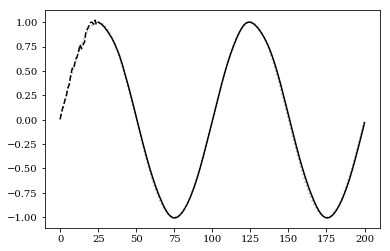

In [31]:
plt.rc('font', family='serif')
plt.figure()
#plt.ylim([-1.5, 1.5])
plt.plot(toy_problem(T, ampl=0), linestyle='dotted', color='#aaaaaa')
plt.plot(original, linestyle='dashed', color='black')
plt.plot(predicted, color='black')
plt.show()

## Computational Graph

In [32]:
show_computational_graph(tf.get_default_graph())

## End